# Image Clustering with K-Means

References:
- Tutorial on PCA vs ZCA: http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/
- Functions for image featurization: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/ 
- Kmeans with VCG16 https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34 
- Kmeans with Resnet50 https://towardsdatascience.com/image-clustering-using-transfer-learning-df5862779571
  
Things we want to do in this tutorial:
- K-means clustering on MNIST data (standardization + whitening) -- decent quality
- K-means clustering on MNIST data (standardization + whitening + rotations) -- worse quality
- K-means clustering on MNIST data (standardization + whitening + rotations + transfer learning - VCG16 and Resnet50 with PCA) -- significant improvement in clustering quality

In [5]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator


11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<Figure size 432x288 with 0 Axes>

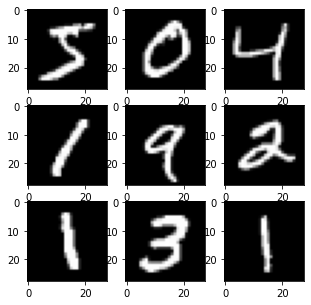

In [11]:
import matplotlib.pyplot as plt
plt.gray();
plt.figure(figsize = (5,5));
for i in range(9):
    plt.subplot(3,3,i+1);
    plt.imshow(x_train[i]);

In [ ]:
def feature_standardization(X_train, X_test):
    # Reference: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
    # reshape to be [samples][width][height][channels]
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    # convert from int to float
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    # define data preparation
    datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
    # fit parameters from data
    datagen.fit(X_train)